In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pprint import pprint
import pickle
import time
import datetime
%matplotlib inline
from setting import *

In [2]:
with open("run_conventional.pkl", "rb") as f:
    run_trotter_5_qubit_trotter = pickle.load(f)
with open("run_hybrid.pkl", "rb") as f:
    run_trotter_5_qubit_hybrid = pickle.load(f)
with open("run_triangle_parallel_exact.pkl", "rb") as f:
    run_trotter_5_qubit_triangle_parallel_exact = pickle.load(f)

In [3]:
fidelities_trotter = run_trotter_5_qubit_trotter["fidelities"]
nums_cnots_trotter = run_trotter_5_qubit_trotter["nums_cnots"]

In [4]:
fidelities_hybrid = run_trotter_5_qubit_hybrid["fidelities"]
nums_cnots_hybrid = run_trotter_5_qubit_hybrid["nums_cnots"]

In [5]:
fidelities_triangle_parallel_exact = run_trotter_5_qubit_triangle_parallel_exact["fidelities"]
nums_cnots_triangle_parallel_exact = run_trotter_5_qubit_triangle_parallel_exact["nums_cnots"]

In [6]:
num_steps_list = np.array(num_steps_list)

<Figure size 640x480 with 0 Axes>

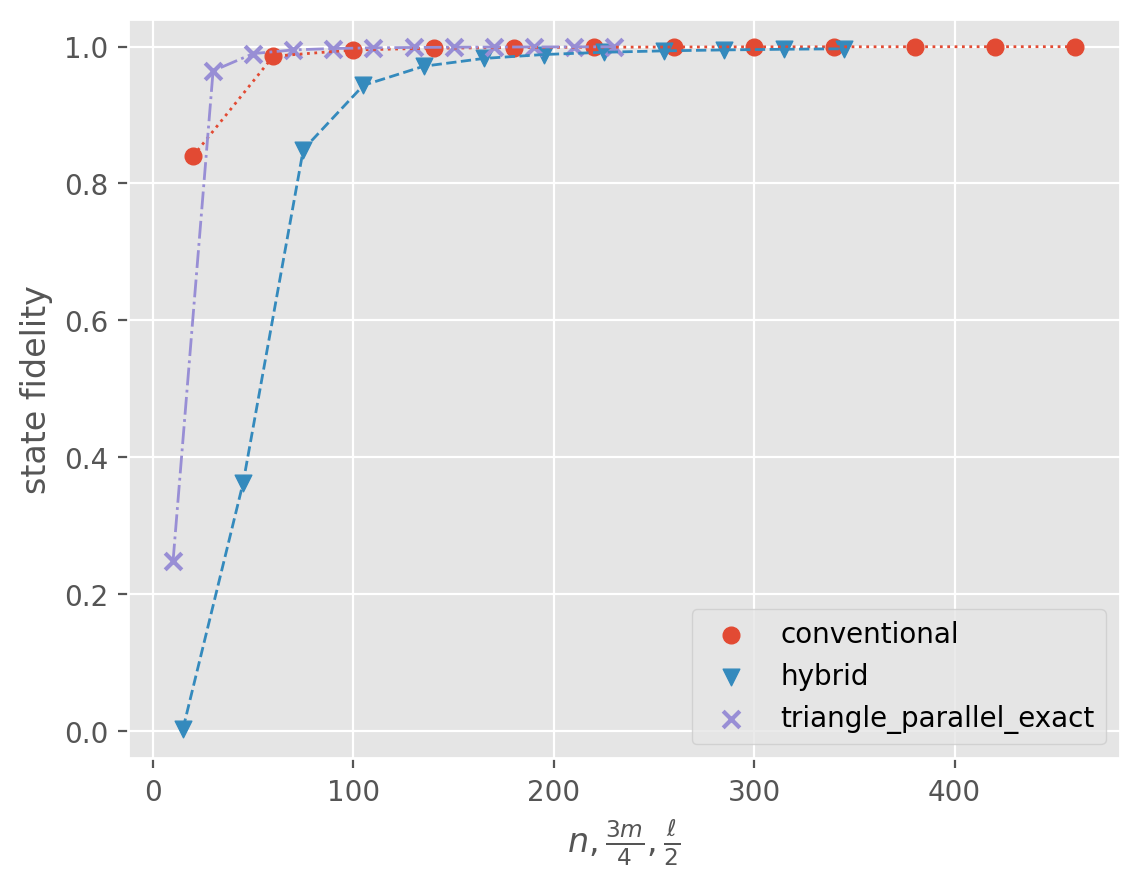

In [7]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(num_steps_list, fidelities_trotter, marker="o")
plt.plot(num_steps_list, fidelities_trotter,linewidth=1, linestyle='dotted')
p2 = plt.scatter(num_steps_list * 3/4, fidelities_hybrid, marker="v")
plt.plot(num_steps_list * 3/4, fidelities_hybrid,linewidth=1, linestyle='dashed')
p3 = plt.scatter(num_steps_list * 1/2, fidelities_triangle_parallel_exact, marker="x")
plt.plot(num_steps_list * 1/2, fidelities_triangle_parallel_exact,linewidth=1, linestyle='dashdot')
# plt.scatter(num_steps_list[:limit], e2d2_fidelities[:limit], marker="x")
plt.xlabel(r"$n, \frac{3m}{4}, \frac{\ell}{2}$")
plt.ylabel("state fidelity")
plt.ylim(bottom=-0.04,top=1.04)
plt.legend([p1, p2, p3],
           ["conventional",
            "hybrid", 
            "triangle_parallel_exact"]) # , "shallow encoding and shallow decoding"))
plt.show()
# plt.title("The effect of encoding and decoding strategy")

<Figure size 640x480 with 0 Axes>

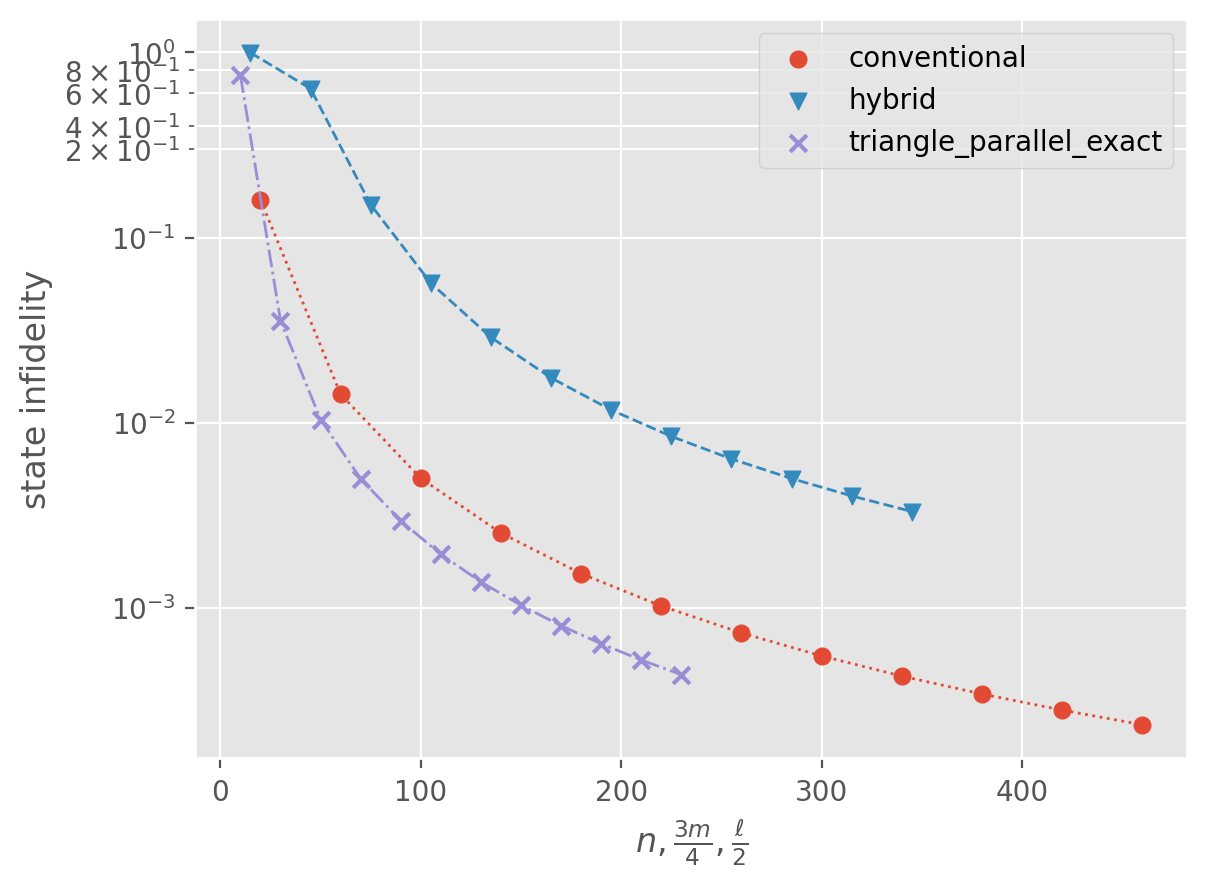

In [8]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(num_steps_list, 1 - np.array(fidelities_trotter), marker="o")
plt.plot(num_steps_list, 1 - np.array(fidelities_trotter),linewidth=1, linestyle='dotted')
p2 = plt.scatter(num_steps_list * 3/4, 1 - np.array(fidelities_hybrid), marker="v")
plt.plot(num_steps_list * 3/4, 1 - np.array(fidelities_hybrid),linewidth=1, linestyle='dashed')
p3 = plt.scatter(num_steps_list * 1/2, 1 - np.array(fidelities_triangle_parallel_exact), marker="x")
plt.plot(num_steps_list * 1/2, 1 - np.array(fidelities_triangle_parallel_exact),linewidth=1, linestyle='dashdot')
# plt.scatter(num_steps_list[:limit], e2d2_fidelities[:limit], marker="x")
# plt.xlabel(r"$\pi/\Delta t$")
plt.xlabel(r"$n, \frac{3m}{4}, \frac{\ell}{2}$")
plt.ylabel("state infidelity")
plt.grid(visible=True,which="minor")
# plt.ylim(bottom=9.0 * 1e-2,top=1.1 * 1e-0)
plt.yscale("log")
plt.yticks([1e-1,3*1e-1,4*1e-1,6*1e-1,8*1e-1,1e-0],
           # [r"$1.0\times10^{-1}$",r"$2.0\times10^{-1}$",r"$4.0\times10^{-1}$",r"$6.0\times10^{-1}$",r"$8.0\times10^{-1}$",r"$1.0\times10^{0}$"],
           [r"$10^{-1}$",r"$2\times10^{-1}$",r"$4\times10^{-1}$",r"$6\times10^{-1}$",r"$8\times10^{-1}$",r"$10^{0}$"],
           minor=True)
plt.legend([p1, p2, p3],
           ["conventional",
            "hybrid", 
            "triangle_parallel_exact"])
plt.show()
# plt.title("The effect of encoding and decoding strategy")

<Figure size 640x480 with 0 Axes>

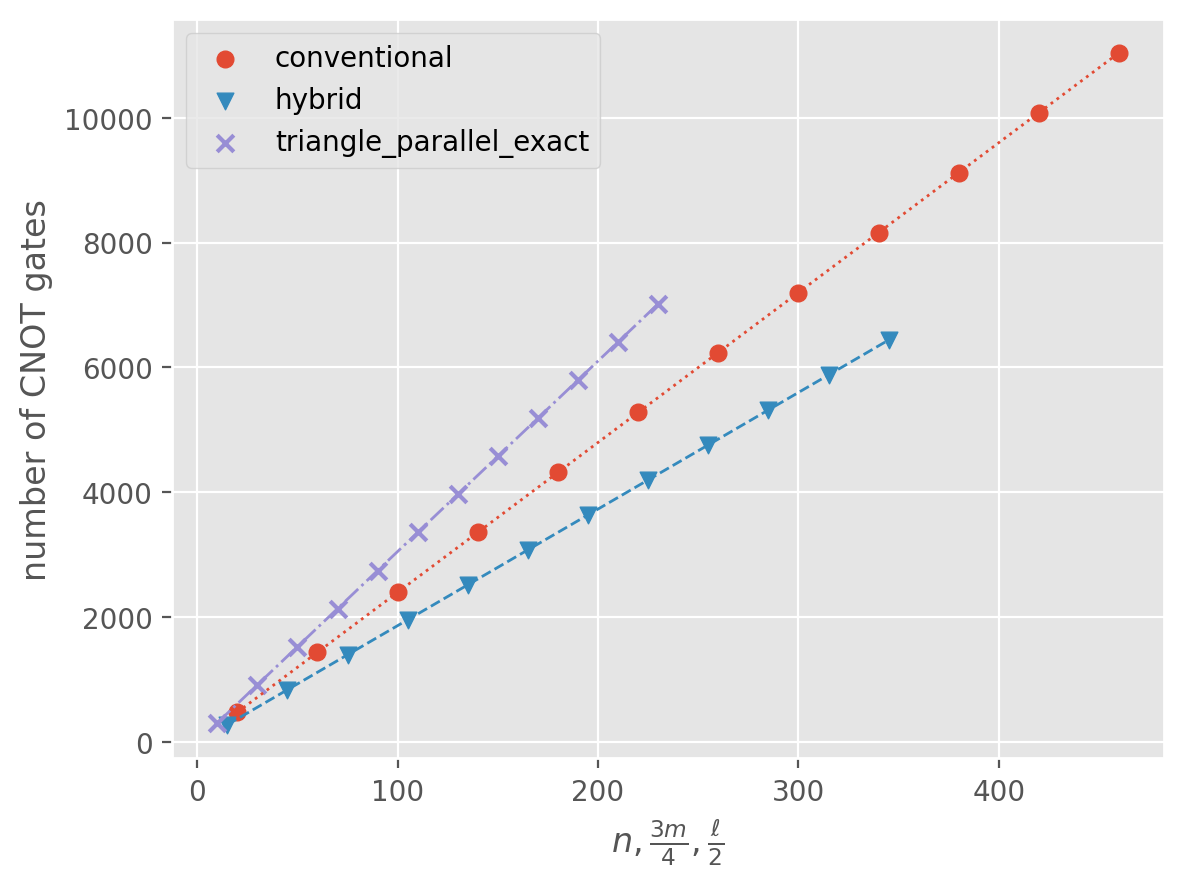

In [9]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(num_steps_list, nums_cnots_trotter, marker="o")
plt.plot(num_steps_list, nums_cnots_trotter,linewidth=1, linestyle='dotted')
p2 = plt.scatter(num_steps_list * 3/4, nums_cnots_hybrid, marker="v")
plt.plot(num_steps_list * 3/4, nums_cnots_hybrid,linewidth=1, linestyle='dashed')
p3 = plt.scatter(num_steps_list * 1/2, nums_cnots_triangle_parallel_exact, marker="x")
plt.plot(num_steps_list * 1/2, nums_cnots_triangle_parallel_exact,linewidth=1, linestyle='dashdot')
# plt.xlabel(r"$\pi/\Delta t$")
plt.xlabel(r"$n, \frac{3m}{4}, \frac{\ell}{2}$")
plt.ylabel("number of CNOT gates")
# plt.ylim(bottom=-0.04,top=1.04)
plt.legend([p1, p2, p3], ["conventional", "hybrid", "triangle_parallel_exact"])
plt.show()
# plt.title("The effect of encoding and decoding strategy")

<Figure size 640x480 with 0 Axes>

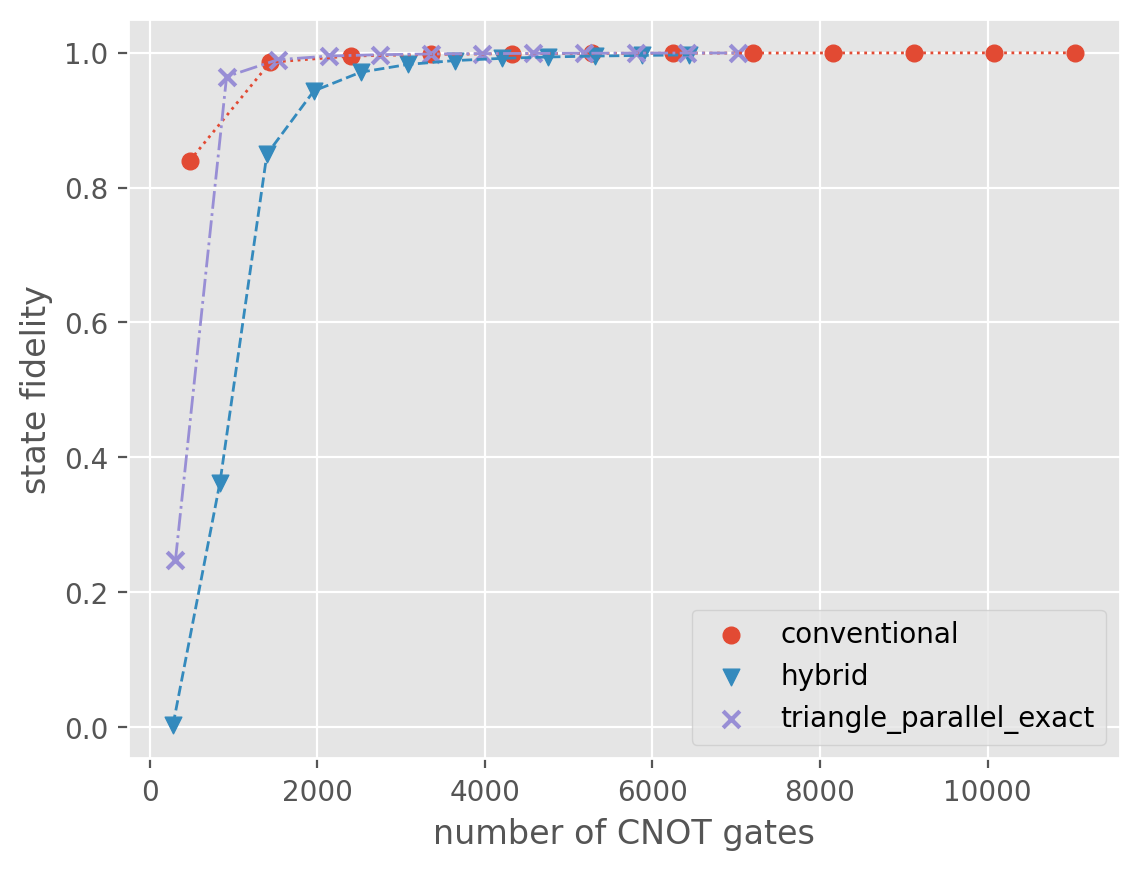

In [10]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(nums_cnots_trotter, fidelities_trotter, marker="o")
plt.plot(nums_cnots_trotter, fidelities_trotter, linewidth=1, linestyle='dotted')
p2 = plt.scatter(nums_cnots_hybrid, fidelities_hybrid, marker="v")
plt.plot(nums_cnots_hybrid, fidelities_hybrid, linewidth=1, linestyle='dashed')
p3 = plt.scatter(nums_cnots_triangle_parallel_exact, fidelities_triangle_parallel_exact, marker="x")
plt.plot(nums_cnots_triangle_parallel_exact, fidelities_triangle_parallel_exact, linewidth=1, linestyle='dashdot')
plt.xlabel("number of CNOT gates")
plt.ylabel("state fidelity")
# plt.ylim(bottom=-0.04,top=1.04)
plt.legend([p1, p2, p3], ["conventional", "hybrid", "triangle_parallel_exact"])
plt.show()
# plt.title("The effect of encoding and decoding strategy")

<Figure size 640x480 with 0 Axes>

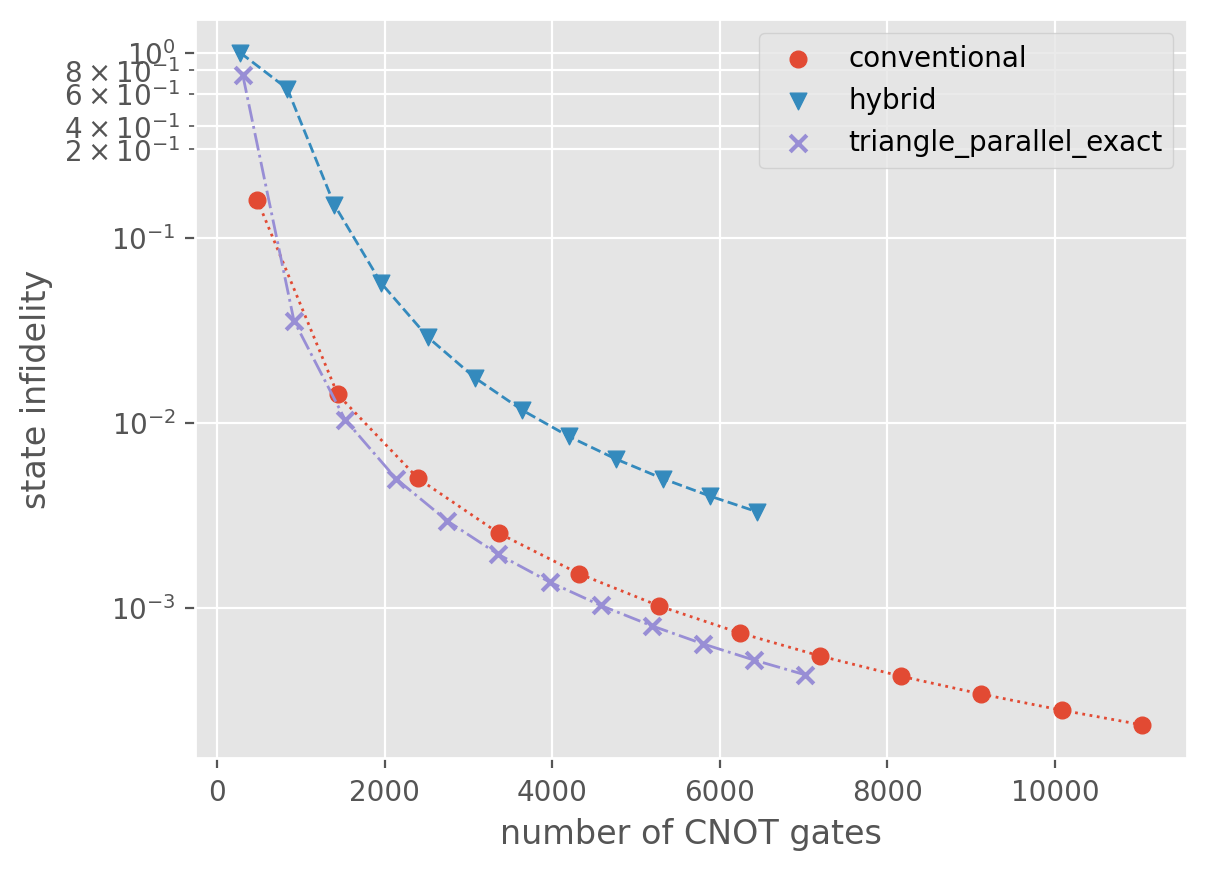

In [11]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(nums_cnots_trotter, 1 - np.array(fidelities_trotter), marker="o")
plt.plot(nums_cnots_trotter, 1 - np.array(fidelities_trotter),linewidth=1, linestyle='dotted')
p2 = plt.scatter(nums_cnots_hybrid, 1 - np.array(fidelities_hybrid), marker="v")
plt.plot(nums_cnots_hybrid, 1 - np.array(fidelities_hybrid),linewidth=1, linestyle='dashed')
p3 = plt.scatter(nums_cnots_triangle_parallel_exact, 1 - np.array(fidelities_triangle_parallel_exact), marker="x")
plt.plot(nums_cnots_triangle_parallel_exact, 1 - np.array(fidelities_triangle_parallel_exact),linewidth=1, linestyle='dashdot')
plt.xlabel("number of CNOT gates")
plt.ylabel("state infidelity")
plt.grid(visible=True,which="minor")
# plt.ylim(bottom=9.0 * 1e-2,top=1.1 * 1e-0)
plt.yscale("log")
plt.yticks([1e-1,3*1e-1,4*1e-1,6*1e-1,8*1e-1,1e-0],
           # [r"$1.0\times10^{-1}$",r"$2.0\times10^{-1}$",r"$4.0\times10^{-1}$",r"$6.0\times10^{-1}$",r"$8.0\times10^{-1}$",r"$1.0\times10^{0}$"],
           [r"$10^{-1}$",r"$2\times10^{-1}$",r"$4\times10^{-1}$",r"$6\times10^{-1}$",r"$8\times10^{-1}$",r"$10^{0}$"],
           minor=True)
plt.legend([p1, p2, p3], ["conventional", "hybrid", "triangle_parallel_exact"]) # , "shallow encoding and shallow decoding"))
plt.show()
# plt.title("The effect of encoding and decoding strategy")

In [12]:
max(fidelities_trotter), max(fidelities_triangle_parallel_exact)

(0.9997670839902502, 0.9995658798400255)

<Figure size 640x480 with 0 Axes>

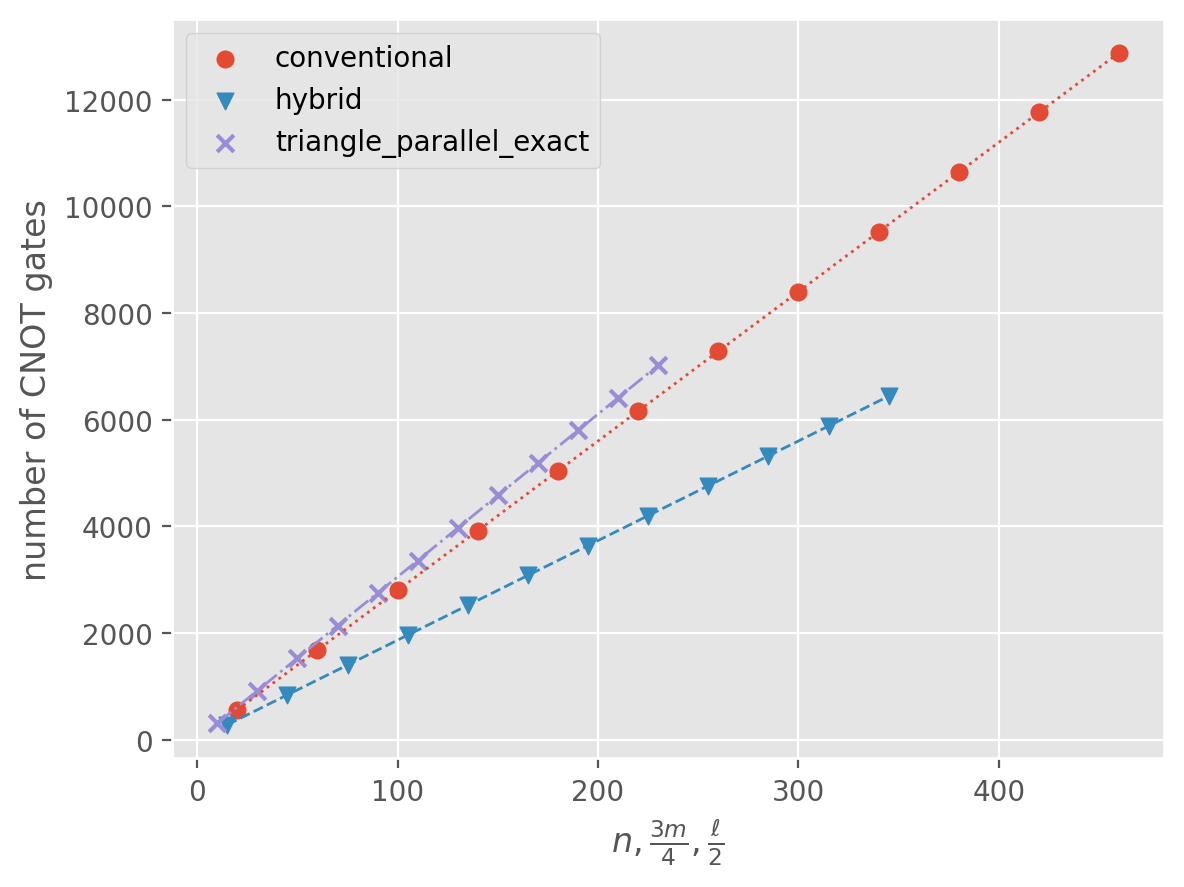

In [13]:
plt.clf()
plt.figure(dpi=200)
p1 = plt.scatter(num_steps_list, np.array(nums_cnots_trotter) * 7 / 6, marker="o")
plt.plot(num_steps_list, np.array(nums_cnots_trotter) * 7 / 6,linewidth=1, linestyle='dotted')
p2 = plt.scatter(num_steps_list * 3/4, nums_cnots_hybrid, marker="v")
plt.plot(num_steps_list * 3/4, nums_cnots_hybrid,linewidth=1, linestyle='dashed')
p3 = plt.scatter(num_steps_list * 1/2, nums_cnots_triangle_parallel_exact, marker="x")
plt.plot(num_steps_list * 1/2, nums_cnots_triangle_parallel_exact,linewidth=1, linestyle='dashdot')
# plt.xlabel(r"$\pi/\Delta t$")
plt.xlabel(r"$n, \frac{3m}{4}, \frac{\ell}{2}$")
plt.ylabel("number of CNOT gates")
# plt.ylim(bottom=-0.04,top=1.04)
plt.legend([p1, p2, p3], ["conventional", "hybrid", "triangle_parallel_exact"])
plt.show()
# plt.title("The effect of encoding and decoding strategy")